In [1]:
import yaml
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [82]:
ww_path = '/home/AZA/PycharmProjects/competitions/cvppa2023/dataset/WW2020/labels_trainval.yml'
with open(ww_path) as f:
    data_raw = yaml.load(f, Loader=yaml.loader.SafeLoader)

In [83]:
data = pd.DataFrame()
data['names'] = data_raw.keys()
data['labels'] = data_raw.values()

In [84]:
# CLASS2LABEL = {label: i for label, i in enumerate(data['labels'].unique())}
# LABEL2CLASS = {label: i for i, label in enumerate(data['labels'].unique())}
CLASS2LABEL = {
    0: "NPK_",
    1: "N_KCa",
    2: "NP_Ca",
    3: "NPKCa",
    4: "unfertilized",
    5: "_PKCa",
    6: "NPKCa+m+s",
}
LABEL2CLASS = {
    "NPK_": 0, #bad
    "N_KCa": 1, #bad
    "NP_Ca": 2, #bad
    "NPKCa": 3, #bad
    "unfertilized": 4, #good
    "_PKCa": 5, #good
    "NPKCa+m+s": 6, #good
}

In [85]:
data['classes'] = data['labels'].apply(lambda x: LABEL2CLASS[x])

In [87]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 0
for train_index, test_index in skf.split(data['names'], data['labels']):
    data.loc[test_index, 'fold'] = fold
    fold += 1

In [88]:
data['fold'] = data['fold'].apply(int)

In [90]:
data.to_csv('/home/AZA/PycharmProjects/competitions/cvppa2023/dataset/WW2020/labels.csv', index=False)

In [91]:
data = pd.read_csv('/home/AZA/PycharmProjects/competitions/cvppa2023/dataset/WW2020/labels.csv')

In [99]:
data['classes'].iloc[101]

4

In [103]:
name, label = data.iloc[30][['names','labels']]

In [106]:
len(data['labels'].unique())

7

In [107]:
a = True

In [108]:
a > 0

True

In [1]:
from src.experiment_config import read_experiment_config
from src.data.datamodule import MyDatamodule

In [2]:
cfg = read_experiment_config('config.yaml')

In [3]:
dm = MyDatamodule(**vars(cfg))
dm.setup(stage='fit')

In [4]:
ds = dm.train_dataset

In [6]:
ds.labels.value_counts('classes')

classes
0    154
2    154
4    154
1    153
3    153
6    153
5    144
Name: count, dtype: int64

Label: NPK_


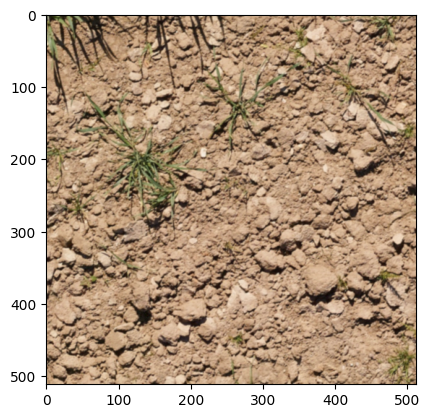

In [18]:
ds.show_example(21)

In [7]:
import os
import shutil
import pandas as pd
from tqdm.notebook import tqdm
save_path = '/home/AZA/PycharmProjects/competitions/cvppa2023/dataset/WW2020/images_per_class/'
read_path = '/home/AZA/PycharmProjects/competitions/cvppa2023/dataset/WW2020/images/'
labels = pd.read_csv('/home/AZA/PycharmProjects/competitions/cvppa2023/dataset/WW2020/labels.csv')

In [6]:
labels['labels'].unique()

array(['NPKCa+m+s', 'NPK_', 'NPKCa', 'unfertilized', '_PKCa', 'NP_Ca',
       'N_KCa'], dtype=object)

In [9]:
for label in labels['labels'].unique():
    os.makedirs(save_path + label)
for i in tqdm(range(len(labels))):
    name, label, cls, fold = labels.iloc[i]
    shutil.copy(read_path + name, os.path.join(save_path, label, name))

  0%|          | 0/1332 [00:00<?, ?it/s]

In [14]:
labels.iloc[230]

names      20200422_296.jpg
labels                N_KCa
classes                   1
fold                      3
Name: 230, dtype: object